# Finding RCA

#### The objective is to use the ticket database and identify the frequent occurring issues in the process/project and provide insights to support team with the focus areas

###### Below are the list of packages to install apart from those default libraries

!pip install nltk
!pip install wordcloud

Below packages will be used for analysis

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vmynam-c/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Read the ticket data and display the number of rows & columns
tickets_df = pd.read_csv('ticket_Data.csv')
tickets_df.shape

(6445, 2)

In [3]:
# Display sample data
tickets_df.head()

,TicketId,Description
0,1,Job re-run
1,2,Job Re-Run
2,3,the job failed due to row count mismatch betwe...
3,4,Job got failed due to name pipe error. Then jo...
4,5,Job got failed due to duplicate issue. Then is...


In [4]:
# Find out if there are any null values
tickets_df.isnull().sum()

TicketId       0
Description    0
dtype: int64

#### Challenge 1 - Tokenization

Using the RegexpTokenizer to make use of regular expression as we can see there are some descriptions with hypen (-). For. e.g re-run. I wanted use them for my analysis

In [5]:
tokenizer = RegexpTokenizer(r'(\w+\-\w+|\w+)')

In [6]:
# create a new column, tokenizing the description column after they are converted to lower case.
tickets_df['split_description'] = tickets_df['Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [7]:
# extract the stop words into variable stop for further use
stop = stopwords.words('english')
# Drop the stop words from description
tickets_df['desc_excl_stop_words'] = tickets_df['split_description']\
                                        .apply(lambda x: [word for word in x if word not in stop])

In [8]:
tickets_df.head() # with new columns

,TicketId,Description,split_description,desc_excl_stop_words
0,1,Job re-run,"[job, re-run]","[job, re-run]"
1,2,Job Re-Run,"[job, re-run]","[job, re-run]"
2,3,the job failed due to row count mismatch betwe...,"[the, job, failed, due, to, row, count, mismat...","[job, failed, due, row, count, mismatch, sourc..."
3,4,Job got failed due to name pipe error. Then jo...,"[job, got, failed, due, to, name, pipe, error,...","[job, got, failed, due, name, pipe, error, job..."
4,5,Job got failed due to duplicate issue. Then is...,"[job, got, failed, due, to, duplicate, issue, ...","[job, got, failed, due, duplicate, issue, issu..."


Will use the column **desc_excl_stop_words** for further analysis on the frequent occurring issues

In [9]:
# Convert descriptions without stopwords to nested list containing tokens and create a description corpora
tickets_descriptions_tokens_list = tickets_df['desc_excl_stop_words'].tolist()
print(tickets_descriptions_tokens_list[:5])

[['job', 're-run'], ['job', 're-run'], ['job', 'failed', 'due', 'row', 'count', 'mismatch', 'source', 'file', 'ods', 'table', 'requested', 'source', 'team', 'place', 'source', 'files', 'job', 'completed', 'placing', 'source', 'file', 'source', 'path'], ['job', 'got', 'failed', 'due', 'name', 'pipe', 'error', 'job', 're-started', 'completed', 'successfully'], ['job', 'got', 'failed', 'due', 'duplicate', 'issue', 'issue', 'fixed', 'job', 're-started', 'issue', 'fixed']]


*** *** End of Challenge 1 *** ***

#### Challenge 2 - ngrams

In this section we will try to find the frequent occuring tokens in ticket descriptions using NLTK n-grams. n-grams are a set of co-occurring or continuous sequence of n items from a sequence of large text or sentence. The item here could be words, letters, and syllables. 1-gram is also called as unigrams are the unique words present in the sentence. Bigram(2-gram) is the combination of 2 words. Trigram(3-gram) is 3 words and so on.

In [10]:
# To generate n-gram token based on the parameter
# uses the description (in tokens) for each ticket separately - tickets_descriptions_tokens_list
# returns the n_gram tokens
def generate_n_grams(n):
    tickets_n_grams = []
    for ticket_desc in tickets_descriptions_tokens_list: 
        ticket_n_grams = ngrams(ticket_desc, n)
        tickets_n_grams.append([ '  '.join(grams) for grams in ticket_n_grams])
    return tickets_n_grams

In [11]:
# 1-gram tokens
unigram_tokens = [n_gram for ticket_n_grams in generate_n_grams(1) for n_gram in ticket_n_grams] 
# 2-gram tokens
bigram_tokens = [n_gram for ticket_n_grams in generate_n_grams(2) for n_gram in ticket_n_grams]
# 3-gram tokens
three_gram_tokens = [n_gram for ticket_n_grams in generate_n_grams(3) for n_gram in ticket_n_grams]
# 4-gram tokens
four_gram_tokens = [n_gram for ticket_n_grams in generate_n_grams(4) for n_gram in ticket_n_grams]

# Use the n-gram token to generate frequency of each token using nltk.FreqDist()
unigram_count = FreqDist(unigram_tokens)
bigram_count = FreqDist(bigram_tokens)
three_gram_count = FreqDist(three_gram_tokens)
four_gram_count = FreqDist(four_gram_tokens)

# output of most commonly occuring token in n-grams are displayed as follows
print(unigram_count.most_common(10))
print(bigram_count.most_common(10))
print(three_gram_count.most_common(10))
print(four_gram_count.most_common(10))

[('job', 7092), ('issue', 3229), ('completed', 3082), ('successfully', 2552), ('due', 2242), ('failed', 1780), ('got', 1420), ('re-run', 1415), ('file', 1261), ('source', 1047)]
[('completed  successfully', 2000), ('failed  due', 1577), ('job  got', 1381), ('job  completed', 1164), ('got  failed', 1033), ('issue  fixed', 903), ('fixed  job', 878), ('issue  job', 685), ('issue  issue', 680), ('source  file', 588)]
[('job  got  failed', 1029), ('got  failed  due', 981), ('job  completed  successfully', 883), ('issue  fixed  job', 855), ('issue  issue  fixed', 645), ('job  restarted  completed', 400), ('running  query  manually', 392), ('restarted  completed  successfully', 384), ('completed  running  query', 380), ('fixed  job  restarted', 363)]
[('job  got  failed  due', 978), ('issue  issue  fixed  job', 631), ('job  restarted  completed  successfully', 380), ('completed  running  query  manually', 374), ('issue  fixed  job  restarted', 359), ('re-run  job  completed  successfully', 34

#### Plot the 20 most commonly occuring tokens in different n-grams (>=1 & <=4)

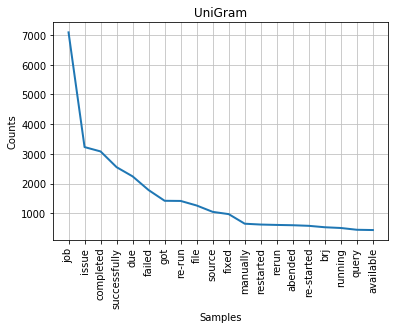

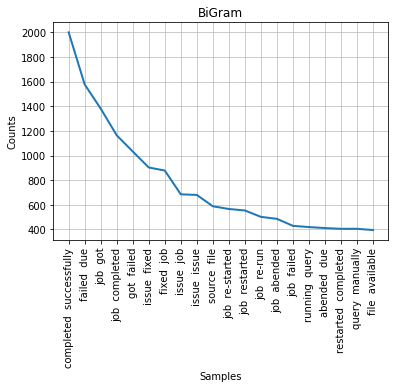

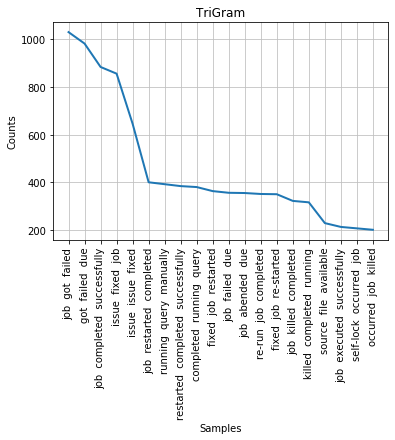

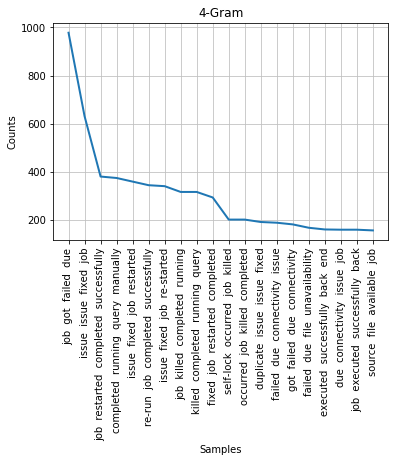

In [12]:
unigram_count.plot(20,cumulative=False, title="UniGram")
bigram_count.plot(20,cumulative=False, title="BiGram")
three_gram_count.plot(20,cumulative=False, title="TriGram")
four_gram_count.plot(20,cumulative=False,title="4-Gram")

From the above plots, 
1. It can be observed that as we move towards higher n-grams we get more details about the issue. 
2. 1-gram is very granular but helpful to understand the frequent provided reasons, resolutions. For e.g. re-runs & re-started appears in top most commonly occuring values, which means those jobs/process are completed successfuly without any fix but with a re-run/restart.
3. 4-gram provides more details about the issue and resolution provided. For. e.g Supporting to our analysis in 1-gram, 4-gram plot shows rerun/restarts resolved most number of tickets (check values from 3-10 in Plot 4). Apart from those, there are connectivity issues which are causing higher volume of tickets.

##### **** Fun part ****

I wanted to make use of tickets description and build a word cloud to see pictorially most frequency occuring issues

In [13]:
# combines all the tokens of all the tickets into corpora
def tokens_corpora(exclude_tokens=[]):
    tickets_tokens_corpora = [token for ticket_tokens in tickets_descriptions_tokens_list for token in ticket_tokens]
    all_tokens = ' '.join([token for token in tickets_tokens_corpora if token not in exclude_tokens])
    return all_tokens

In [14]:
# prepares the word cloud and return it to plot using matplotlib
def generate_and_display_word_cloud(exclude_tokens=[]):
    normal_word = r"(\w+\-\w+|\w+)"
    all_tokens = tokens_corpora(exclude_tokens)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', stopwords=stop,
                min_font_size = 10, regexp=normal_word, collocations=False).generate(all_tokens) 
    return wordcloud

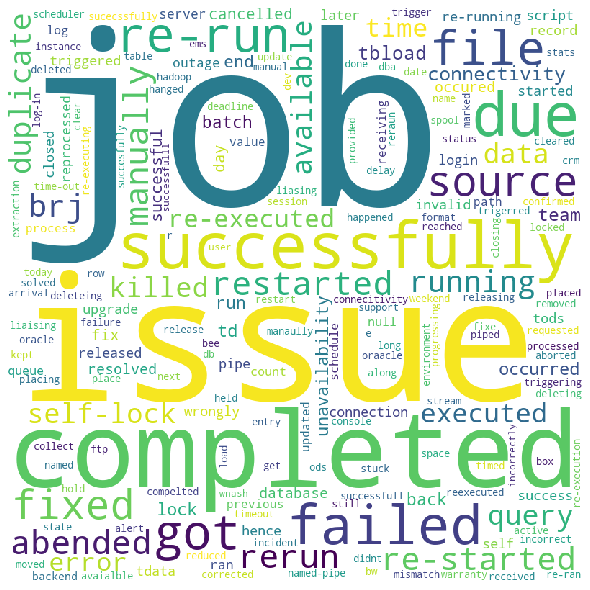

In [15]:
wordcloud = generate_and_display_word_cloud()
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

We see words like **job, successfully, completed, due, got, failed** occur more than other words. I am interested to find other words excluding these mentioned as they common failure reasons. So, I will add these words to my exclusion list

In [20]:
exclude_tokens=['job', 'issue', 'completed','successfully','due','failed', 'got', 'fixed']

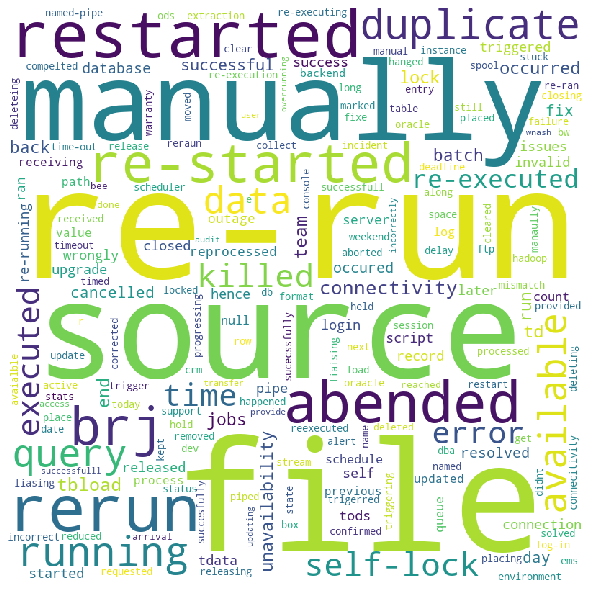

In [21]:
wordcloud = generate_and_display_word_cloud(exclude_tokens)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

This can be played around by adding not so appropriate words to the exclusion list and generate a new word cloud.
Can also think of preparing n-gram word cloud.

###### Thank you